# **AutoML with PyCaret-clustering PalmerPenguin dataset**

[PyCaret](https://pycaret.org/): opern-source low-code machine learning library in Python that automates machine learning workflows.
Extra reading: [medium](https://alam-jane61.medium.com/classification-problem-with-pycaret-a0eb43a2f1ca)

**About the dataset:**

Data was collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network. Data is available by CC-0 license in accordance with the Palmer Station LTER Data Policy and the LTER Data Access Policy for Type I data. The palmerpenguins package contains two datasets. Penguins_raw and Penguins. Both datasets contain data for 344 penguins. There are 3 different species of penguins in this dataset, collected from 3 islands in the Palmer Archipelago, Antarctica from 2007- 2009 [RPubs by Rstudio](https://rpubs.com/michelle10128/923430).

**Image source:** [medium](https://alam-jane61.medium.com/classification-problem-with-pycaret-a0eb43a2f1ca)

[Dataset](): Palmer's penguins.

Task: [Clustering](https://en.wikipedia.org/wiki/Cluster_analysis), palmerpenguins.

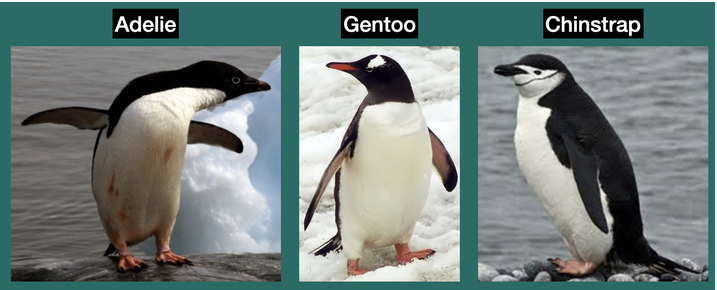

**Import libraries:**

In [ ]:
# pycaret and it dependencies
#!pip install pycaret
#!pip install -r requirements.txt
#!pip install -r requirements-optional.txt

In [ ]:
# scipy
#!pip uninstall scipy
#!pip install scipy

In [9]:
# pandas, matplotlib and seaborn for wrangling and viusalization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Import the dataset:**

In [6]:
# install palmergenguins
#!pip install palmerpenguins

In [11]:
# import and load the dataset from the palmergenguin python library
from palmerpenguins import load_penguins
penguins = load_penguins()

# create a copy for analysis
df = penguins.copy()

### **Basic EDA and sanity check:**

In [12]:
# head (first 5 rows of the dataset)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [13]:
# columns as list
df.columns.tolist()

['species',
 'island',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex',
 'year']

In [14]:
# shape of the dataset
df.shape

(344, 8)

In [15]:
# check datatypes
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

**Missing values**

In [16]:
# check for missing values
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [19]:
# dropna and clean the dataset then assigned to new
df_new = df.dropna()
df_new.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

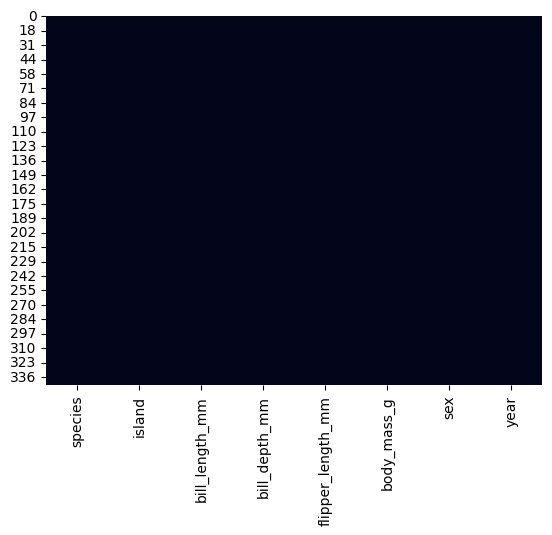

In [23]:
# let's visualize the missing values
sns.heatmap(df_new.isnull(), cbar=False);

**Island proportion and count**

In [31]:
# check the island proportion
df_new['island'].value_counts(normalize=True)

Biscoe       0.489489
Dream        0.369369
Torgersen    0.141141
Name: island, dtype: float64

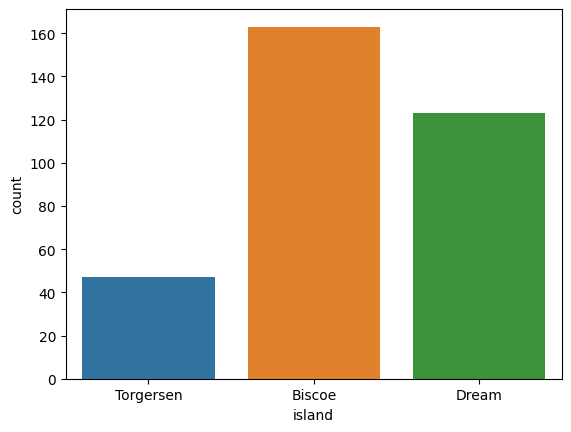

In [32]:
# check the island proportion count
sns.countplot(x='island',data=df_new);

**Species proportion and count**

In [33]:
# check the species proportion
df_new['species'].value_counts(normalize=True)

Adelie       0.438438
Gentoo       0.357357
Chinstrap    0.204204
Name: species, dtype: float64

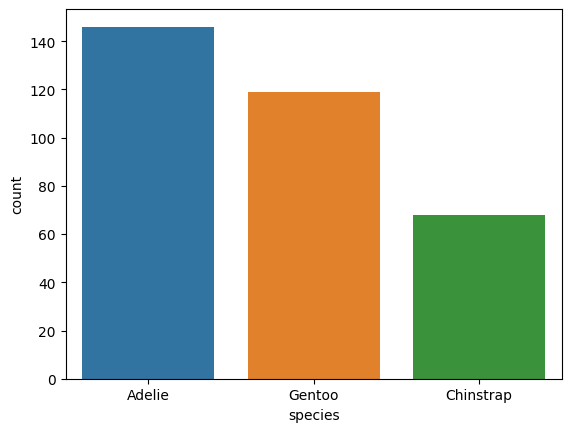

In [34]:
# check the the species count
sns.countplot(x='species',data=df_new);

**Population of penguins by gender on each island**

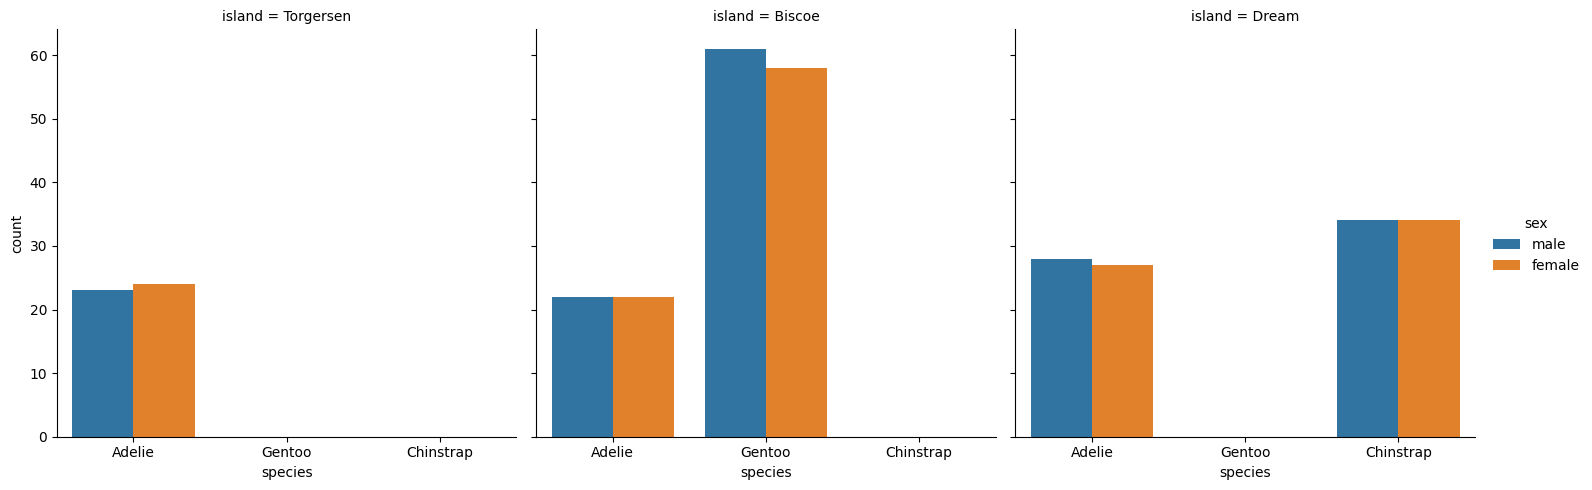

In [36]:
sns.catplot(x="species", hue="sex", col="island",data=df_new, kind="count") ;

**Bodymass by species:**

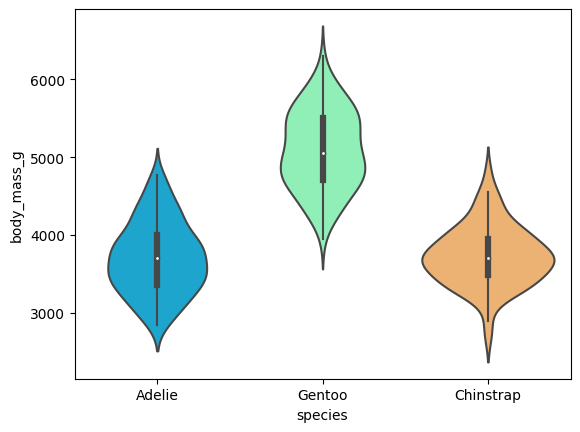

In [38]:
sns.violinplot(x="species", y="body_mass_g", data=df_new,palette='rainbow');

**Seaborn's correlation plot to visualize the relation between the variables:**

In [ ]:
# drop year and island
df_new.drop(['year', 'island'], axis = 1, inplace = True)

In [76]:
# we will the using the new dataset X for ease
X = df_new[df_new.columns.tolist()[1:5]]

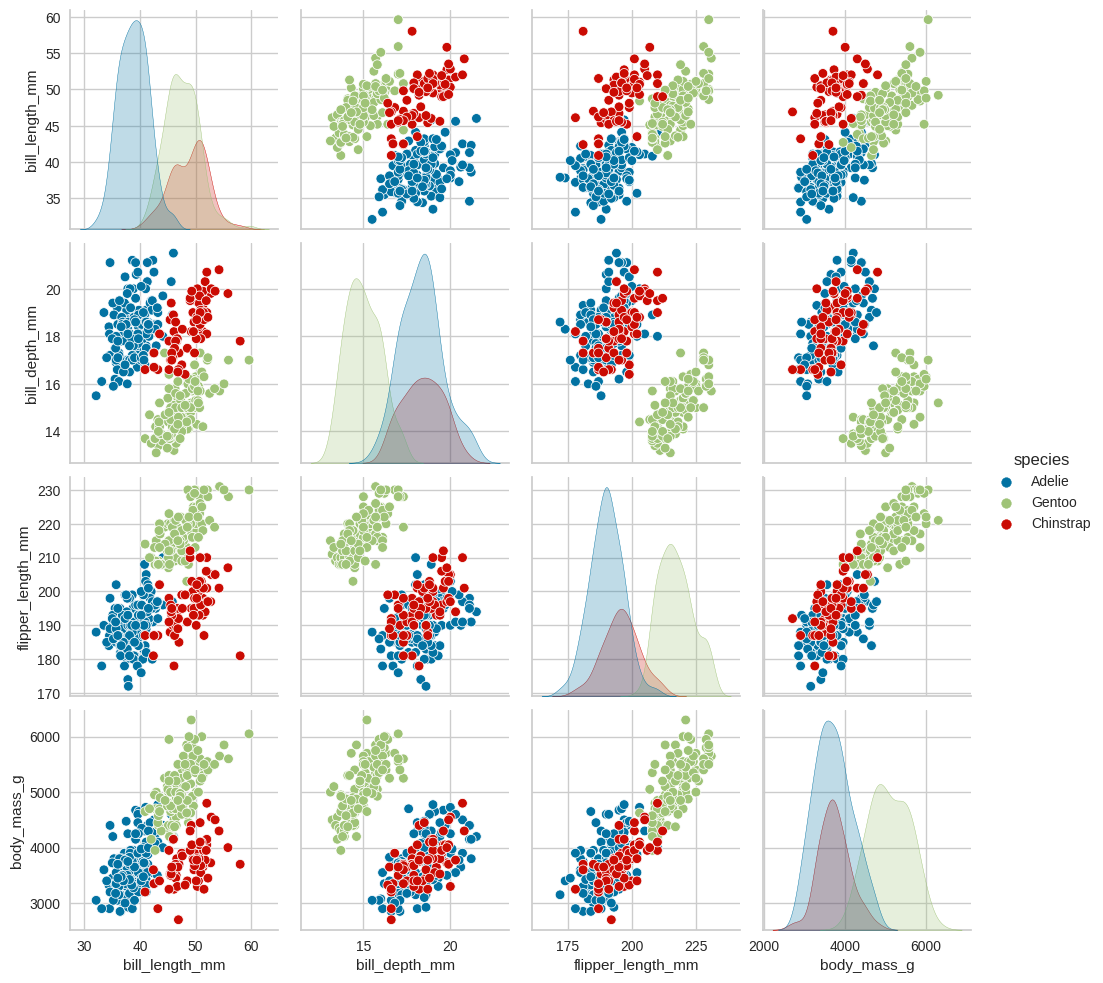

In [78]:
sns.pairplot(df_new,hue='species');

**Correlation heatmap:**

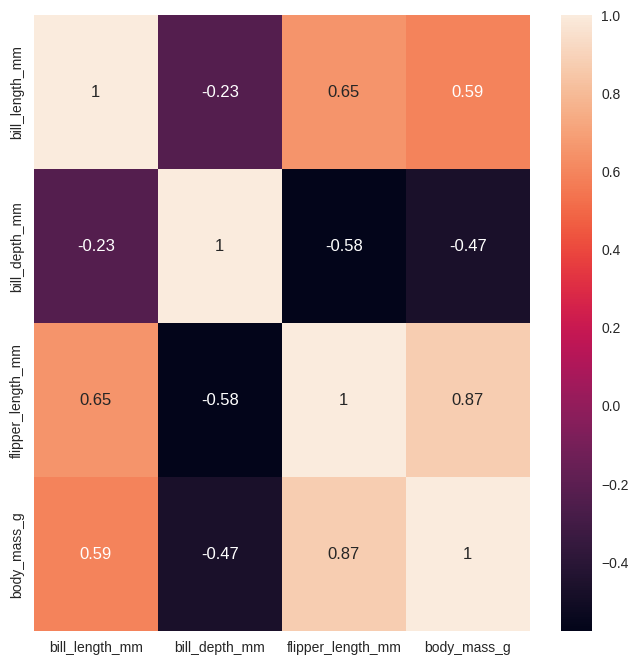

In [59]:
# Correlation heatmap
plt.figure(figsize=(8,8))
sns.heatmap(df_new.corr(numeric_only=True), annot=True);

**After some sanity check and basic EDA we have get a sense of our dataset, now let's jump into the the nitty-gritty of [PyCaret](pycaret.org) for performing clustering**

In [82]:
# import
from pycaret.clustering import * #models, setup, compare_models, create_model, tune_model, plot_model

In [95]:
df_new.columns

Index(['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [100]:
%%time
# init setup
s = setup(data = df_new, ignore_features = ['species','sex'], session_id=123,
             experiment_name='PalmerPenguin')

,Description,Value
0,Session id,123
1,Original data shape,"(333, 6)"
2,Transformed data shape,"(333, 4)"
3,Ignore features,2
4,Numeric features,4
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,CPU Jobs,-1


CPU times: user 78.9 ms, sys: 2.25 ms, total: 81.1 ms
Wall time: 304 ms


In [131]:
# model training
kmeans = create_model('kmeans', num_clusters = 3)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5664,1081.4780,0.5270,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

###**Result:**
silhouette score of 0.5664



###**Analyze Model**

The reason for the train-test-split is to utilize the visualization capabilities of [Yellowbrick](www.scikit-yb.org) by scitit.

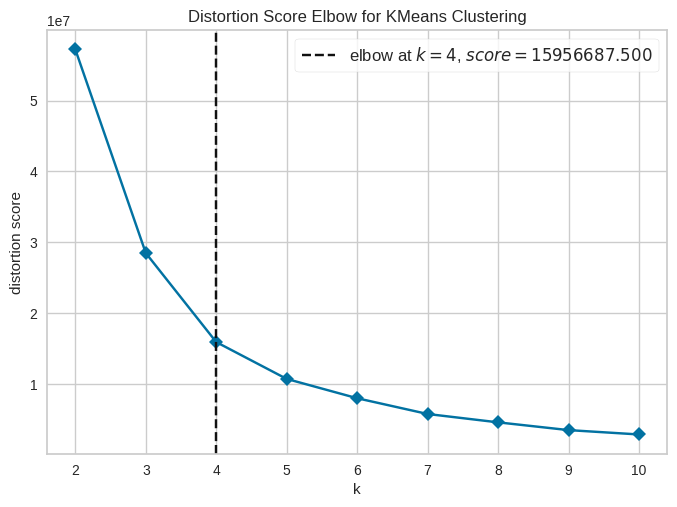

In [132]:
plot_model(kmeans, 'elbow')

**Plot cluster 2D and 3D :**

In [125]:
plot_model(kmeans)

**plot cluster distribution**

In [126]:
plot_model(kmeans, plot = 'distribution')

**Save model:**

In [127]:
save_model(kmeans, model_name='kmeans')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['bill_length_mm', 'bill_depth_mm',
                                              'flipper_length_mm',
                                              'body_mass_g'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model', KMeans(n_clusters=3, random_state=123))]),
 'kmeans.pkl')

**Load model:**

In [128]:
loaded_kmeans = load_model('kmeans')
print(loaded_kmeans)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['bill_length_mm', 'bill_depth_mm',
                                             'flipper_length_mm',
                                             'body_mass_g'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model', KMeans(n_clusters=3, random_state=123))])


**Show the inner mechanism of the Kmeans model:**

In [129]:
from sklearn import set_config
set_config(display='diagram')
loaded_kmeans

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['bill_length_mm', 'bill_depth_mm',
                                             'flipper_length_mm',
                                             'body_mass_g'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model', KMeans(n_clusters=3, random_state=123))])

**For model deployment on AWS:**

<code>
deploy_model(kmeans, model_name = 'kmeans-aws', authentication = {'bucket' : 'pycaret-test'})
</code>

####**Further reading:** [Yellowbrick](https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html), [Pycaret](https://pycaret.gitbook.io/docs/)


Playwith POSIT clustering: [https://colorado.posit.co/rsc/multi-tab/](https://colorado.posit.co/rsc/multi-tab/)